In [1]:
import SIMSIToolBox
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error
import random as rd
import seaborn as sb
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy import spatial
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.svm import SVR
cosineSim = lambda x1,x2: 1 - spatial.distance.cosine(x1, x2)
import statsmodels.api as sm
from scipy.interpolate import interp1d
from sklearn.metrics import r2_score
import statsmodels.api as sm
import sympy as sym
import pickle as pkl

In [2]:
#goal simulate labeling patterns

n=100
c13ab = 0.0 #natural abundance
numCarbons = 18
N = np.array([(1-c13ab)**2,2*(1-c13ab)*c13ab,c13ab**2]) #get expected labeling of precursor from natural abundance
exprList = SIMSIToolBox.generateISAExpressions(SIMSIToolBox.getISAEq(numCarbons),numCarbons)
isa_func = sym.lambdify(*exprList)

gs1 = np.random.random(n)
es1 = np.random.random(n)
os1 = np.random.random(n)
gs = gs1 / (gs1 + es1 + os1)
es = es1 / (gs1 + es1 + os1)
os = os1 / (gs1 + es1 + os1)
ds = .5 * np.random.random(n) + .5
ts = np.random.random((n,3)) + 0.2
ts = np.array([x/np.sum(x) for x in ts])


In [4]:
labeling_theo = []
for g,t,d,e,o in zip(gs,ts,ds,es,os):
    x = d * t + (1-d) * N
    labeling_theo.append(isa_func(x[0],x[1],x[2],N[0],N[1],N[2],g,o,e))
labeling_theo = np.array(labeling_theo)

[0.52836459 0.21076053 0.26087488]
[0.52898483 0.2227864  0.24822878]
[0.5883801  0.17117438 0.24044552]
[0.56553102 0.13165939 0.30280959]
[0.47337381 0.30927826 0.21734793]
[0.61719688 0.12997279 0.25283033]
[0.50187921 0.30354456 0.19457623]
[0.41398017 0.3910652  0.19495463]
[0.53733483 0.08393373 0.37873144]
[0.46965207 0.21906024 0.31128769]
[0.74891809 0.13727194 0.11380998]
[0.40380495 0.14075612 0.45543894]
[0.72246494 0.09212257 0.18541248]
[0.28904369 0.25652206 0.45443425]
[0.72208235 0.07048582 0.20743183]
[0.38429095 0.2859861  0.32972296]
[0.32072148 0.35286026 0.32641826]
[0.35331698 0.3593613  0.28732172]
[0.63925935 0.1677191  0.19302155]
[0.47879001 0.20934163 0.31186836]
[0.37818353 0.37600138 0.24581509]
[0.4881204  0.23830334 0.27357626]
[0.56669501 0.11333881 0.31996618]
[0.63003331 0.13425791 0.23570879]
[0.56899917 0.17572403 0.2552768 ]
[0.15770564 0.67104854 0.17124581]
[0.63492008 0.10644575 0.25863417]
[0.64331596 0.28302662 0.07365742]
[0.55626074 0.242995

In [5]:
plt_dict = {}

for noiseFrac in np.linspace(0.0,.5,15):
    for g,d,t,e,l_true in zip(gs,ds,ts,es,labeling_theo):
        x_true = d * np.array(t) + (1-d) * np.array(N)
        noise = np.random.random(l_true.shape)
        noise = noiseFrac * noise / np.sum(noise)
        l_obs = (1-noiseFrac) * l_true / np.sum(l_true)
        l_obs = [l+ns for l,ns in zip(l_obs,noise)]
        l_obs = np.array(l_obs)/np.sum(l_obs)
                
        err_measure = np.mean([np.abs(x-y) for x,y in zip(l_obs,l_true)])
        
        g_pred, e_pred,_, x_pred, err, l_pred = SIMSIToolBox.ISAFit_e_g([0,0,1],N,l_obs,exprList,list(range(len(l_obs))),np.array([0.33,0.33,0.33]))
        
        err_x = np.sum(np.abs(x_true-x_pred))
        err_g = np.abs(g_pred-g)
        err_e = np.abs(e_pred-e)
        err_total = np.abs(e + g - g_pred - e_pred)
                
        
        if g_pred > -.0001 and g_pred < 1.1 and all(xx > -0.01 and xx < 1.1 for xx in x_pred) and g_pred > -.0001 and g_pred < 1.1 and e_pred > -0.001 and e_pred < 1.1 :
            plt_dict[len(plt_dict)] = {"method":"SISA","error in g(t)":err_g,"err_total":err_total,"measurement error":err_measure,"error in acetyl-CoA":err_x,"error in e(t)":err_e,"fit_error":err}
        
plt_dict = pd.DataFrame.from_dict(plt_dict,orient="index")
plt_dict = plt_dict.sort_values(by="measurement error")
plt_dict

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\SIMSIToolBox\__init__.py:818: RuntimeWarning: invalid value encountered in double_scalars
  lambda x: objectiveFunc(P, func(x[3]/np.sum(x[3:6]),x[4]/np.sum(x[3:6]),x[5]/np.sum(x[3:6]),N[0],N[1],N[2],x[0]/np.sum(x[:3]),x[1]/np.sum(x[:3]),x[2]/np.sum(x[:3])), goodInd) + 0.001 * (x[0] + x[2])/np.sum(x[:3]),


,method,error in g(t),err_total,measurement error,error in acetyl-CoA,error in e(t),fit_error
62,SISA,0.000666,0.003272,0.000000,0.003395,0.003938,0.000379
23,SISA,0.001693,0.021799,0.000000,0.615655,0.020106,0.000037
24,SISA,0.000054,0.005186,0.000000,0.008237,0.005241,0.000643
49,SISA,0.000008,0.009556,0.000000,0.029088,0.009548,0.000458
71,SISA,0.001597,0.003822,0.000000,0.000801,0.005419,0.000942
...,...,...,...,...,...,...,...
1491,SISA,0.334064,0.453733,0.045237,0.441403,0.119670,0.013218
1401,SISA,0.407751,0.418537,0.046009,0.175155,0.010786,0.005264
1406,SISA,0.390290,0.136163,0.046040,0.618196,0.254127,0.013513
1423,SISA,0.372234,0.447816,0.046303,0.481976,0.075582,0.005747


err_total 0.5162338464307319


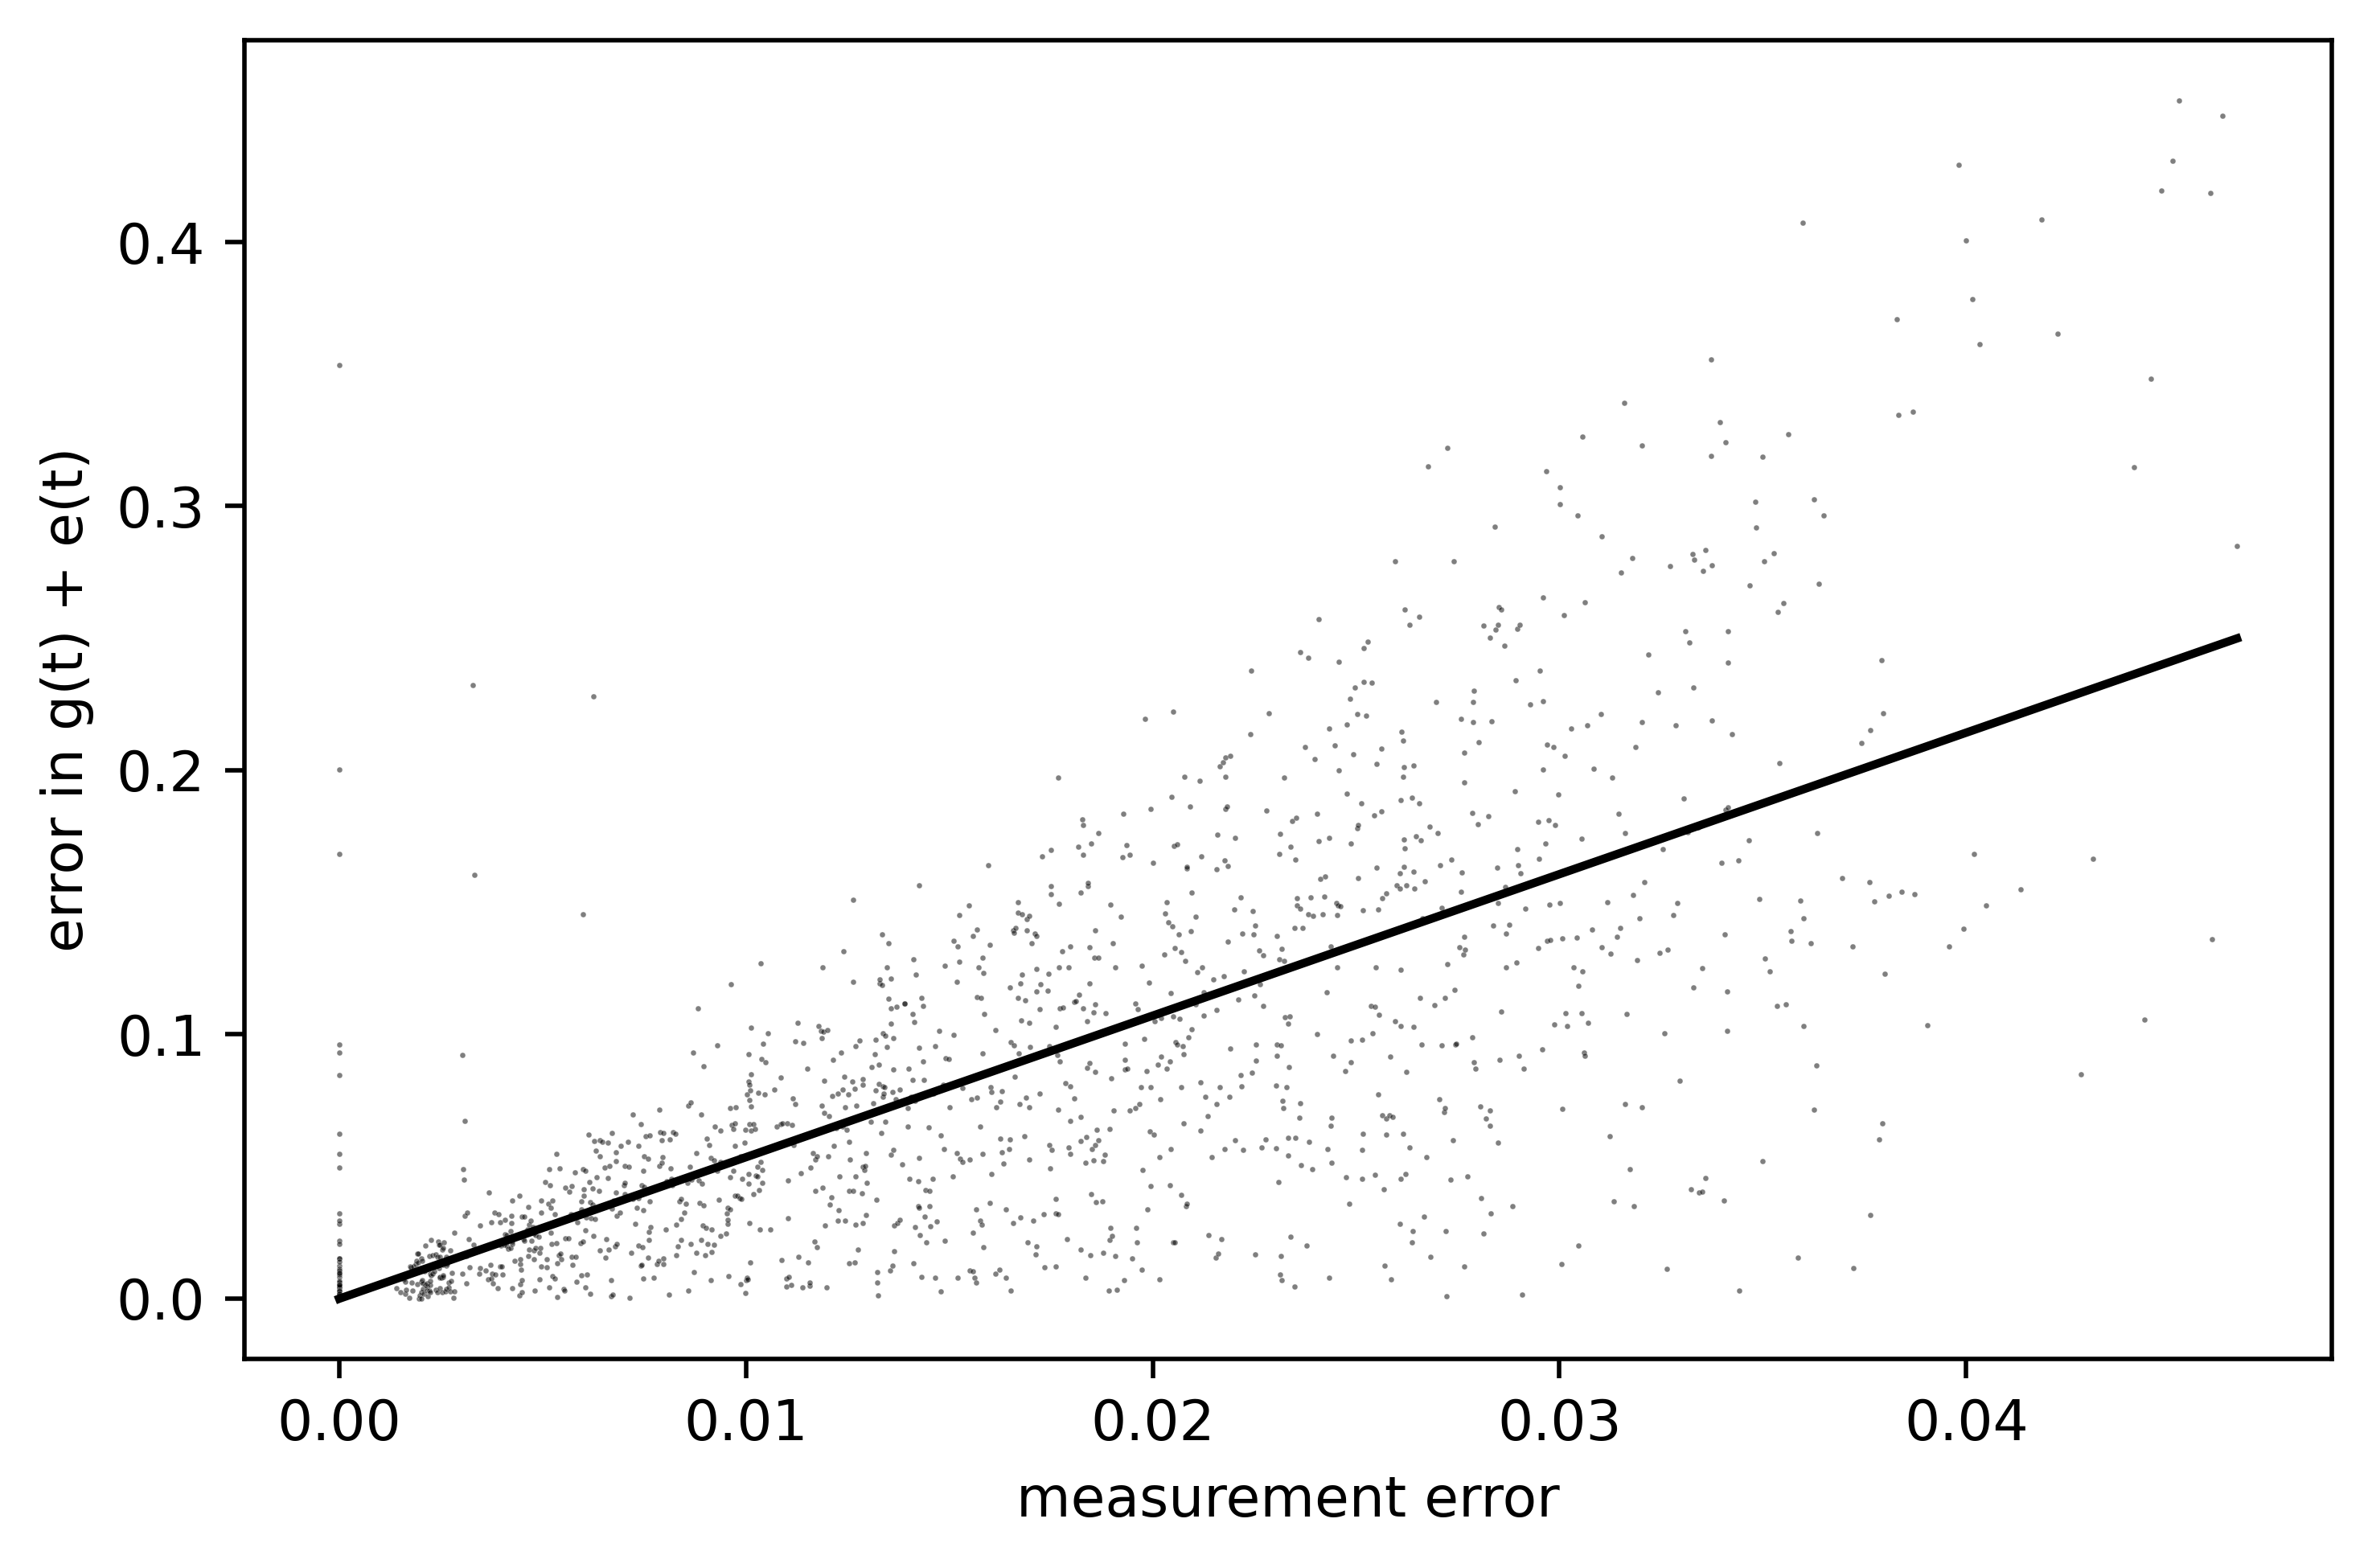

In [7]:
palette = {"err_total":"black"}
#palette = {"error in acetyl-CoA":"green"}
models = {}
#sb.lineplot(data=plt_dict,x="measurement error",y="error in g(t)",hue="method",palette=palette)
for error,color in palette.items():
    filt = plt_dict[plt_dict["method"] == "SISA"]
    #sb.regplot(data=filt,x="measurement error",y=error, ci=0,scatter_kws={"s": .1,"alpha":1.0},color=color,label=error)
    sb.scatterplot(data=filt,x="measurement error",y=error, s = 1,alpha=0.5,color=color)#,label=error)
    linReg = LinearRegression()
    linReg.fit(filt["measurement error"].values.reshape(-1,1),filt[error].values)
    #z = lowess(filt[error].values, filt["measurement error"].values,is_sorted=False)
    #pred = interp1d(z[:,0],z[:,1])(filt["measurement error"].values)
    pred = linReg.predict(filt["measurement error"].values.reshape(-1,1))
    r2 = r2_score(filt[error].values,pred)
    plt.plot(filt["measurement error"].values,pred,color=color)
    models[error] = interp1d(filt["measurement error"].values,pred,fill_value="extrapolate")
    print(error,r2)
    
plt.ylabel("error in g(t) + e(t)")
plt.tight_layout()
plt.savefig("../figures_presentations/noise_g_t_scatter_stearate.png")
#plt.legend()


In [8]:
datadir = "X:/MSI_Shared_Data/13CImagingManuscript/raw_data/non-perfused/desi/12C/"
[peaklist,msis] = pkl.load(open(datadir + "processed_data.pkl","rb"))

In [9]:
msi = msis[list(msis.keys())[0]]

In [10]:
inds = -1
targ = "C18H36O2"
for index,row in peaklist.iterrows():
    if row["formula"] == targ:
        inds = row["inds"]
        break
inds

[271,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 289]

In [11]:
#calculation labeling pattern images and save result
goodInds = [x for x in range(len(msi.data_tensor)) if x not in [17]]
iso_tensor = SIMSIToolBox.normalizeTensor(msi.data_tensor[inds])

In [12]:
patterns = []
for row in range(iso_tensor.shape[1]):
    for col in range(iso_tensor.shape[2]):
        if msi.imageBoundary[row,col] > 0.5:
            patterns.append(iso_tensor[:,row,col])
print(len(patterns))

21061


In [13]:
truePattern = isa_func(1.0,0,0,1.0,0,0,1.0,0.0,0.0)
print(truePattern)

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


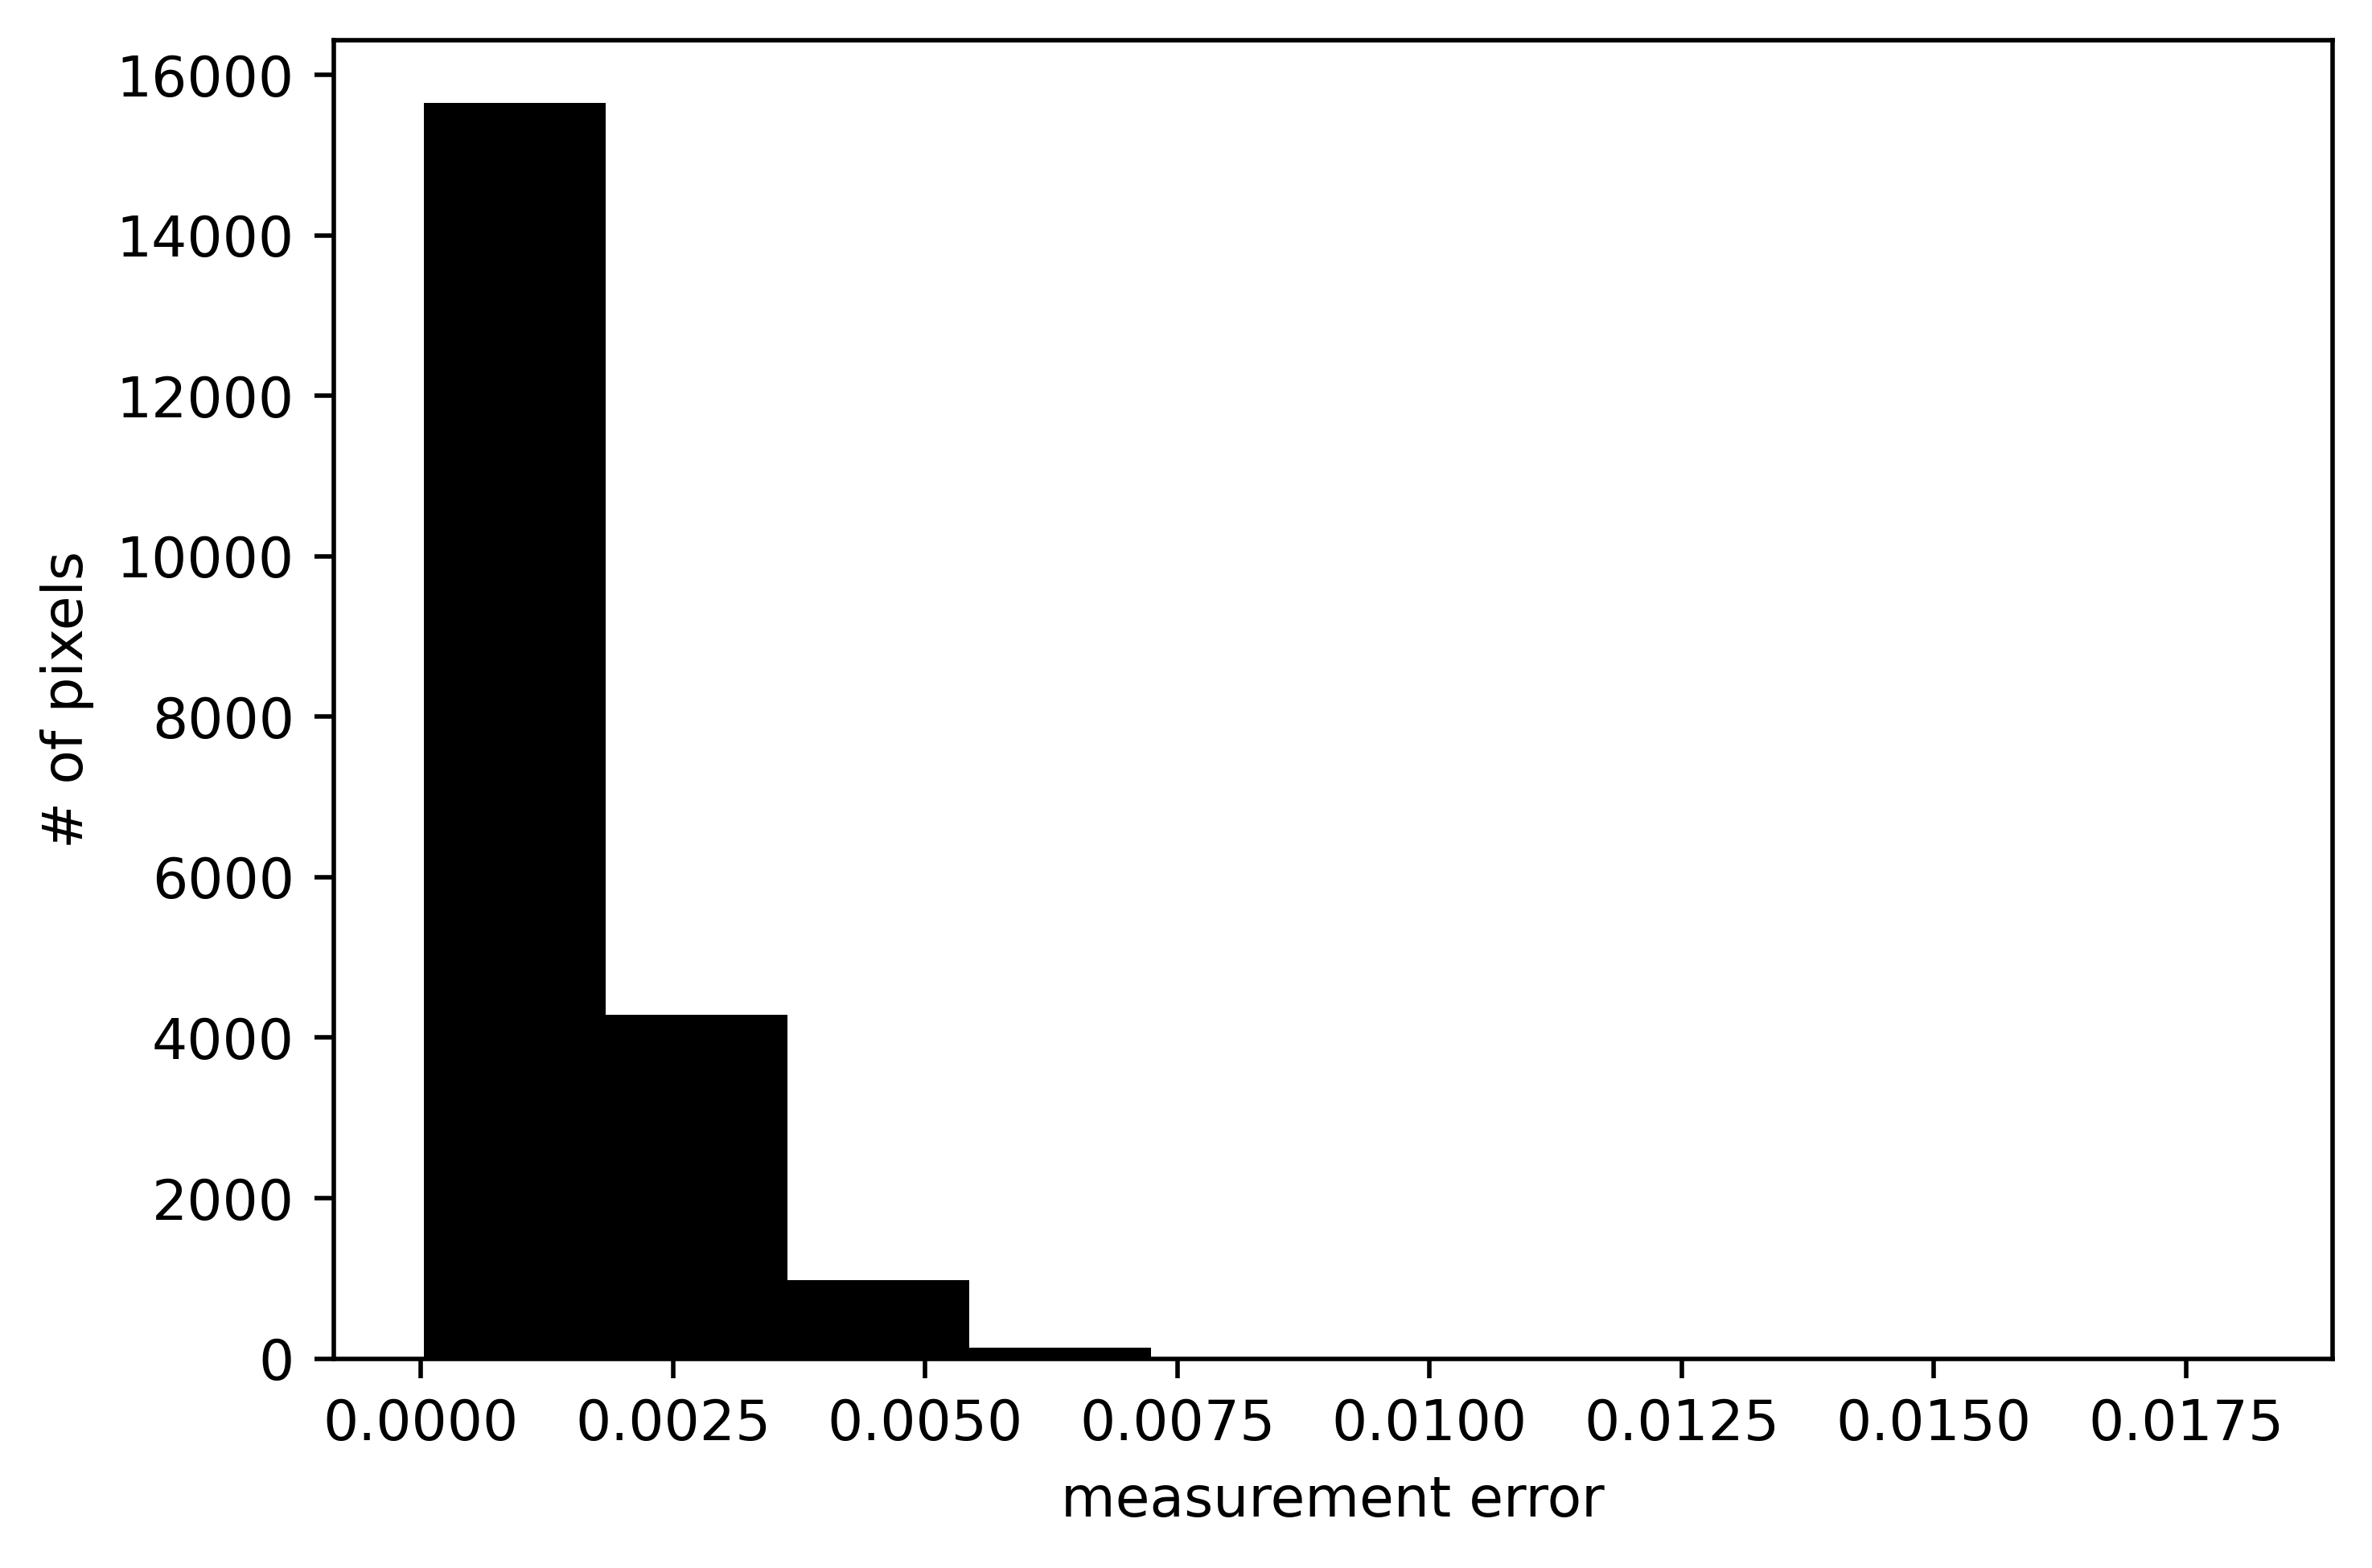

In [15]:
errs = []
for pattern in patterns:
    err_measure = np.mean([np.abs(x-y) for x,y in zip(pattern,truePattern)])
    errs.append(err_measure)
plt.hist(errs,color="black")
plt.xlabel("measurement error")
plt.ylabel("# of pixels")
plt.tight_layout()
plt.savefig("../figures_presentations/measurement_error_hist_stearate.png")

Text(0, 0.5, '# of pixels')

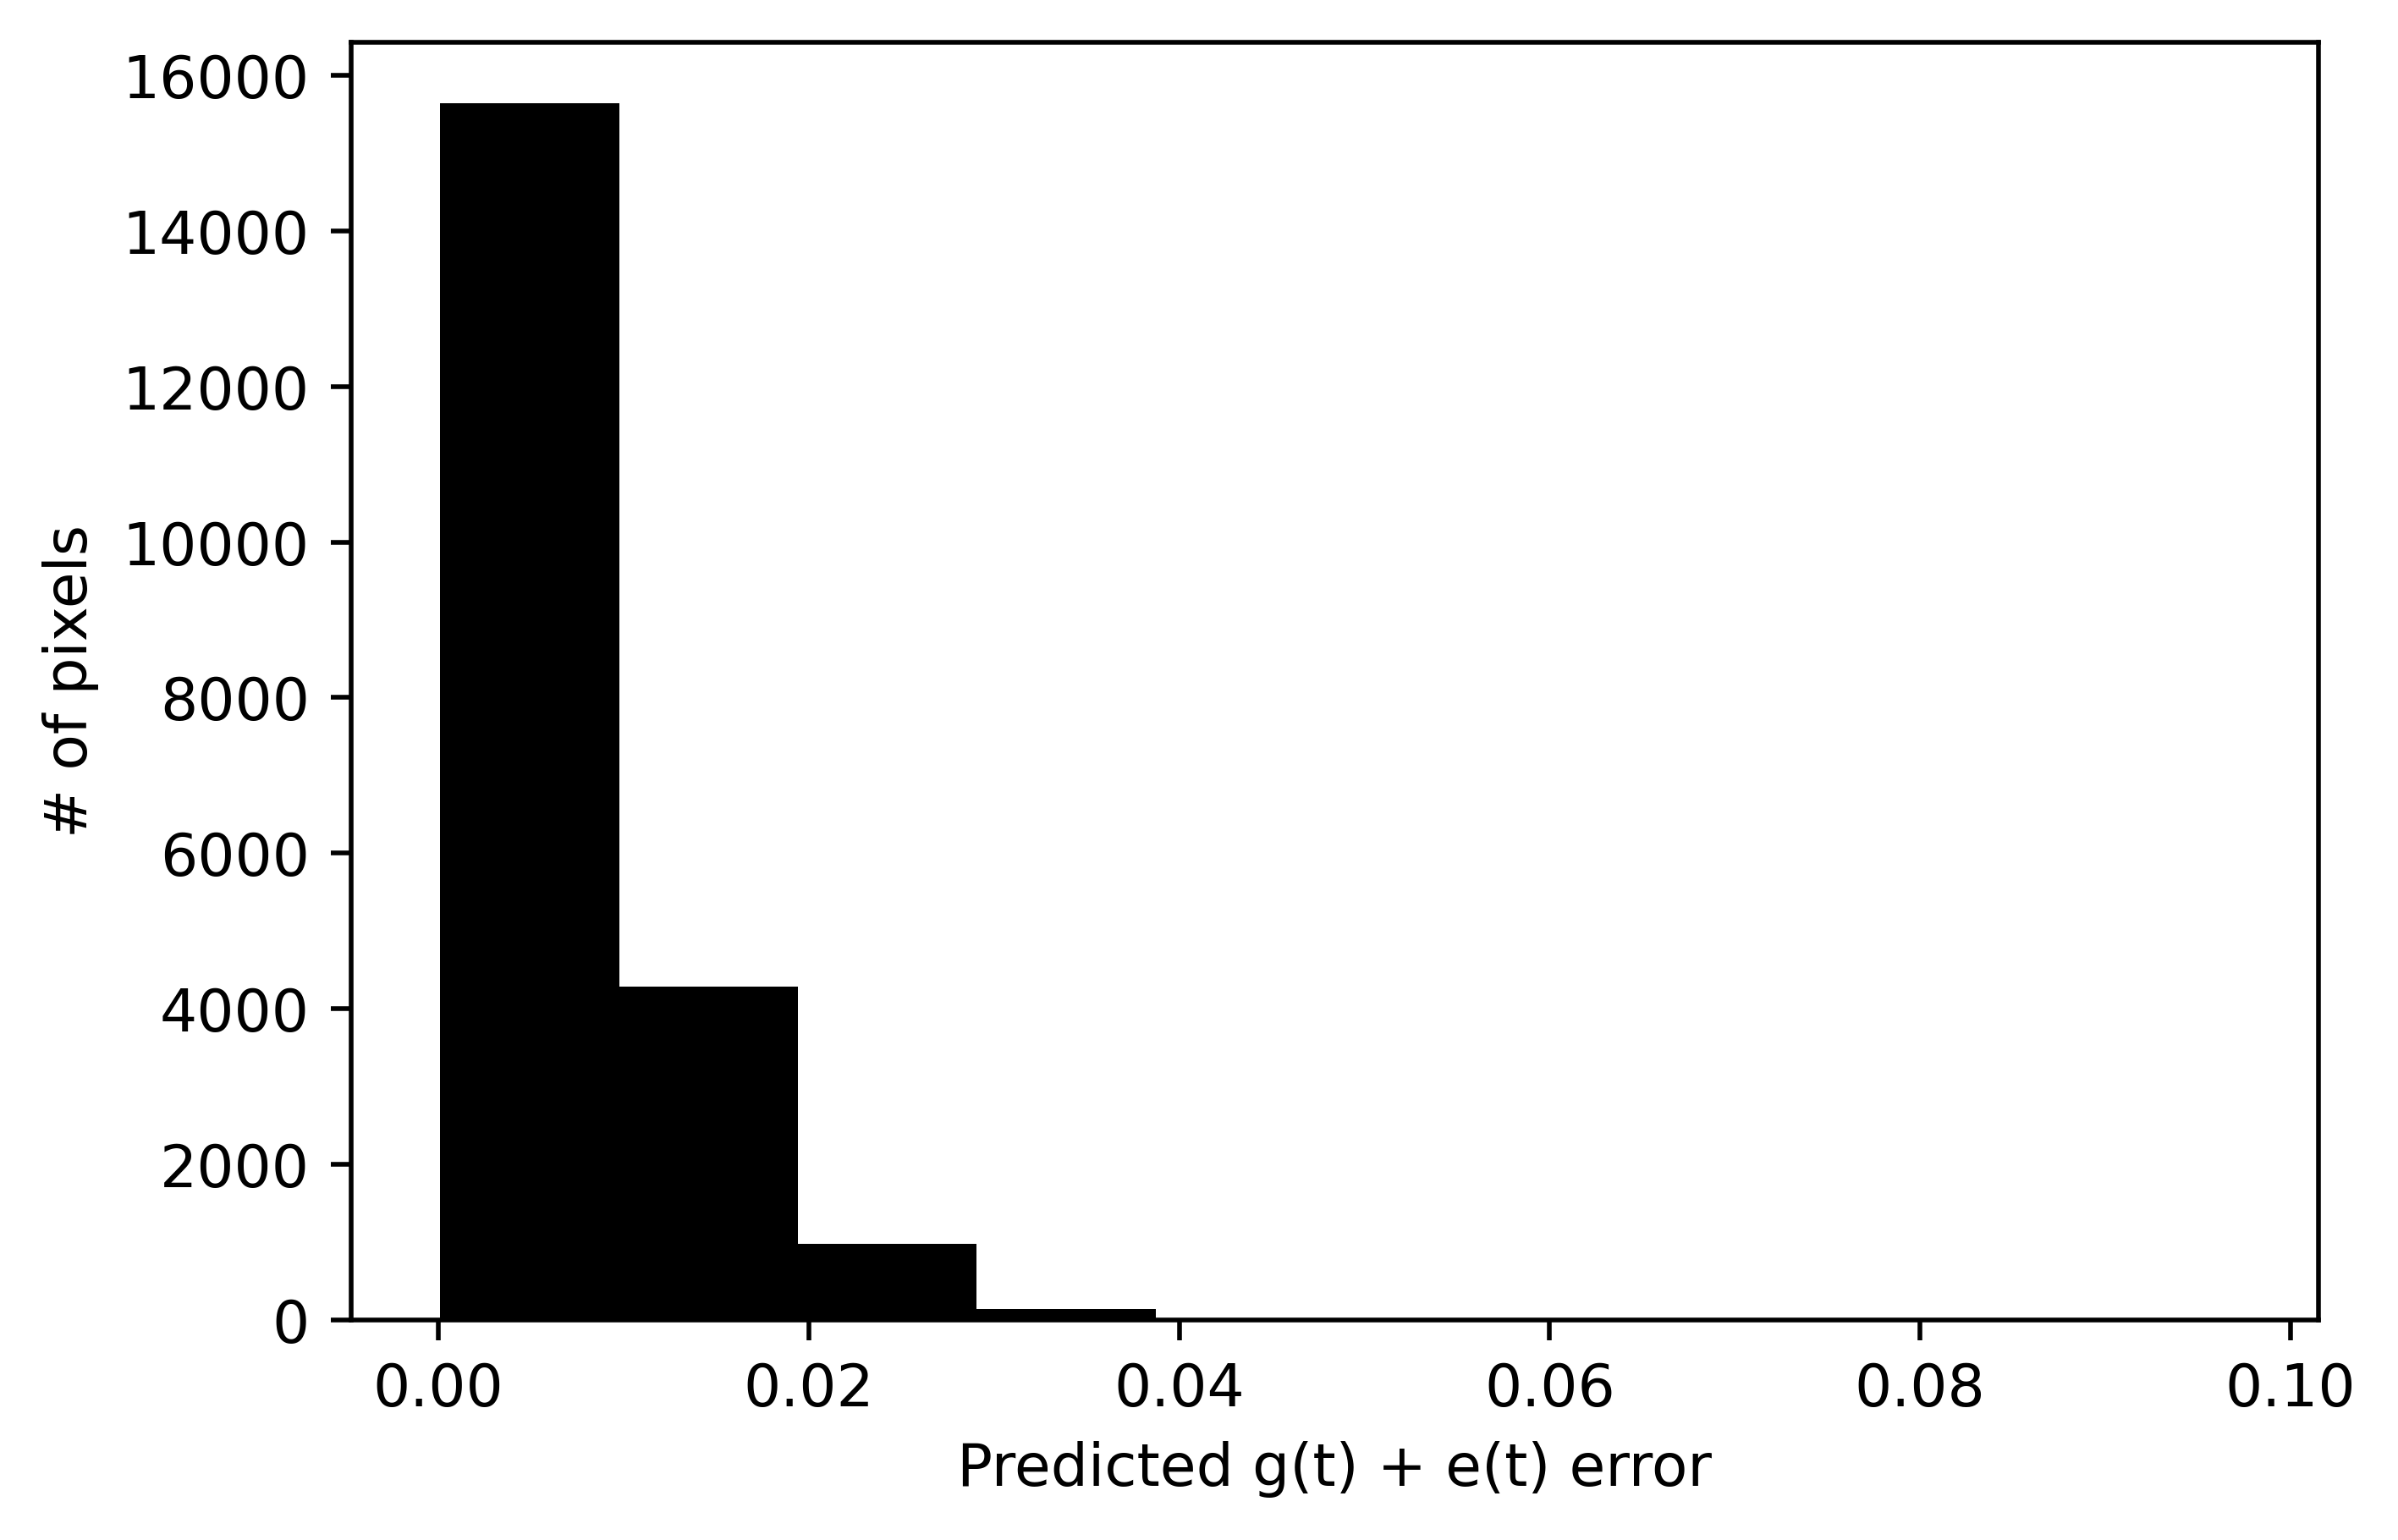

In [17]:
gerrs = []
xerrs = []
for err in errs:
    gerrs.append(models["err_total"](err).tolist())

plt.hist(gerrs,color="black")
plt.xlabel("Predicted g(t) + e(t) error")
plt.ylabel("# of pixels")

In [18]:
datadir = "X:/MSI_Shared_Data/13CImagingManuscript/raw_data/non-perfused/desi/13C/"
[peaklist,msis,fluxImages] = pkl.load(open(datadir + "processed_data.pkl","rb"))

In [26]:
key = "20221031_mt_tumor_brain4-4_13D_13C_10um_70-560mz Analyte 1_1_recal.imzML"

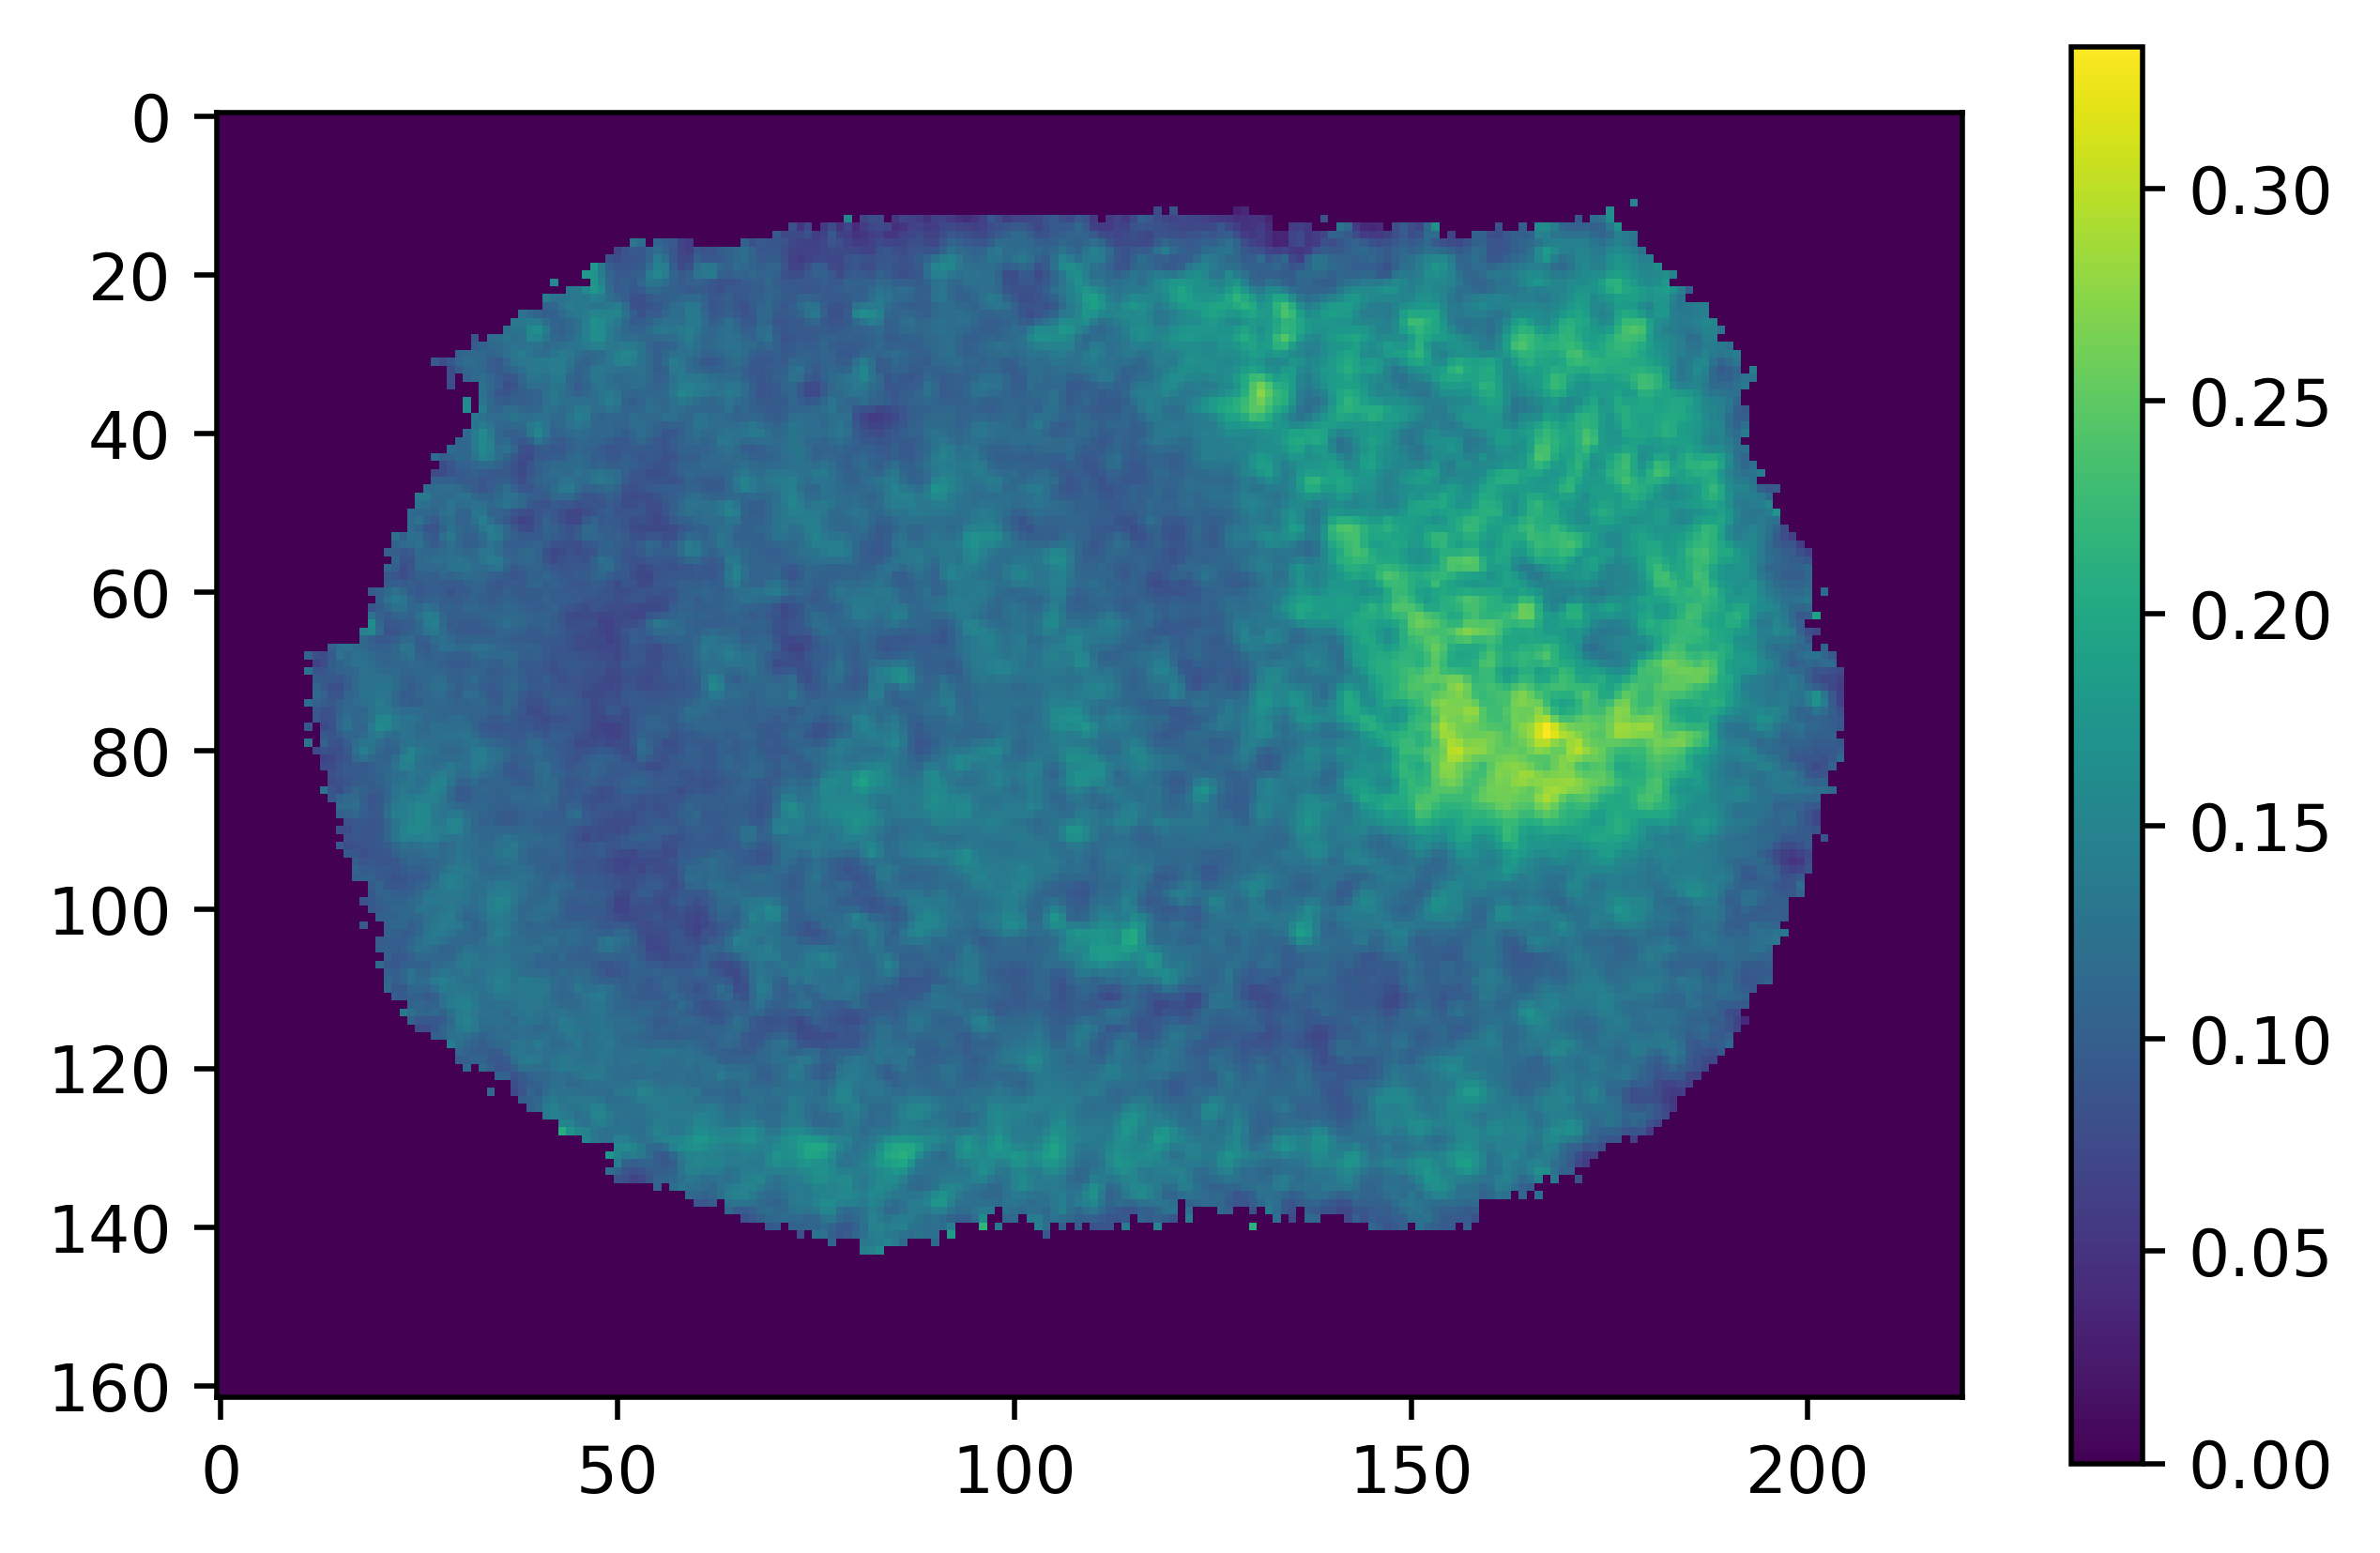

In [27]:
fluxImage = fluxImages[key]["stearate"]["g+e"]
plt.imshow(fluxImage)
plt.colorbar()

In [28]:
vals = fluxImage[msis[key].imageBoundary > 0.5].flatten()

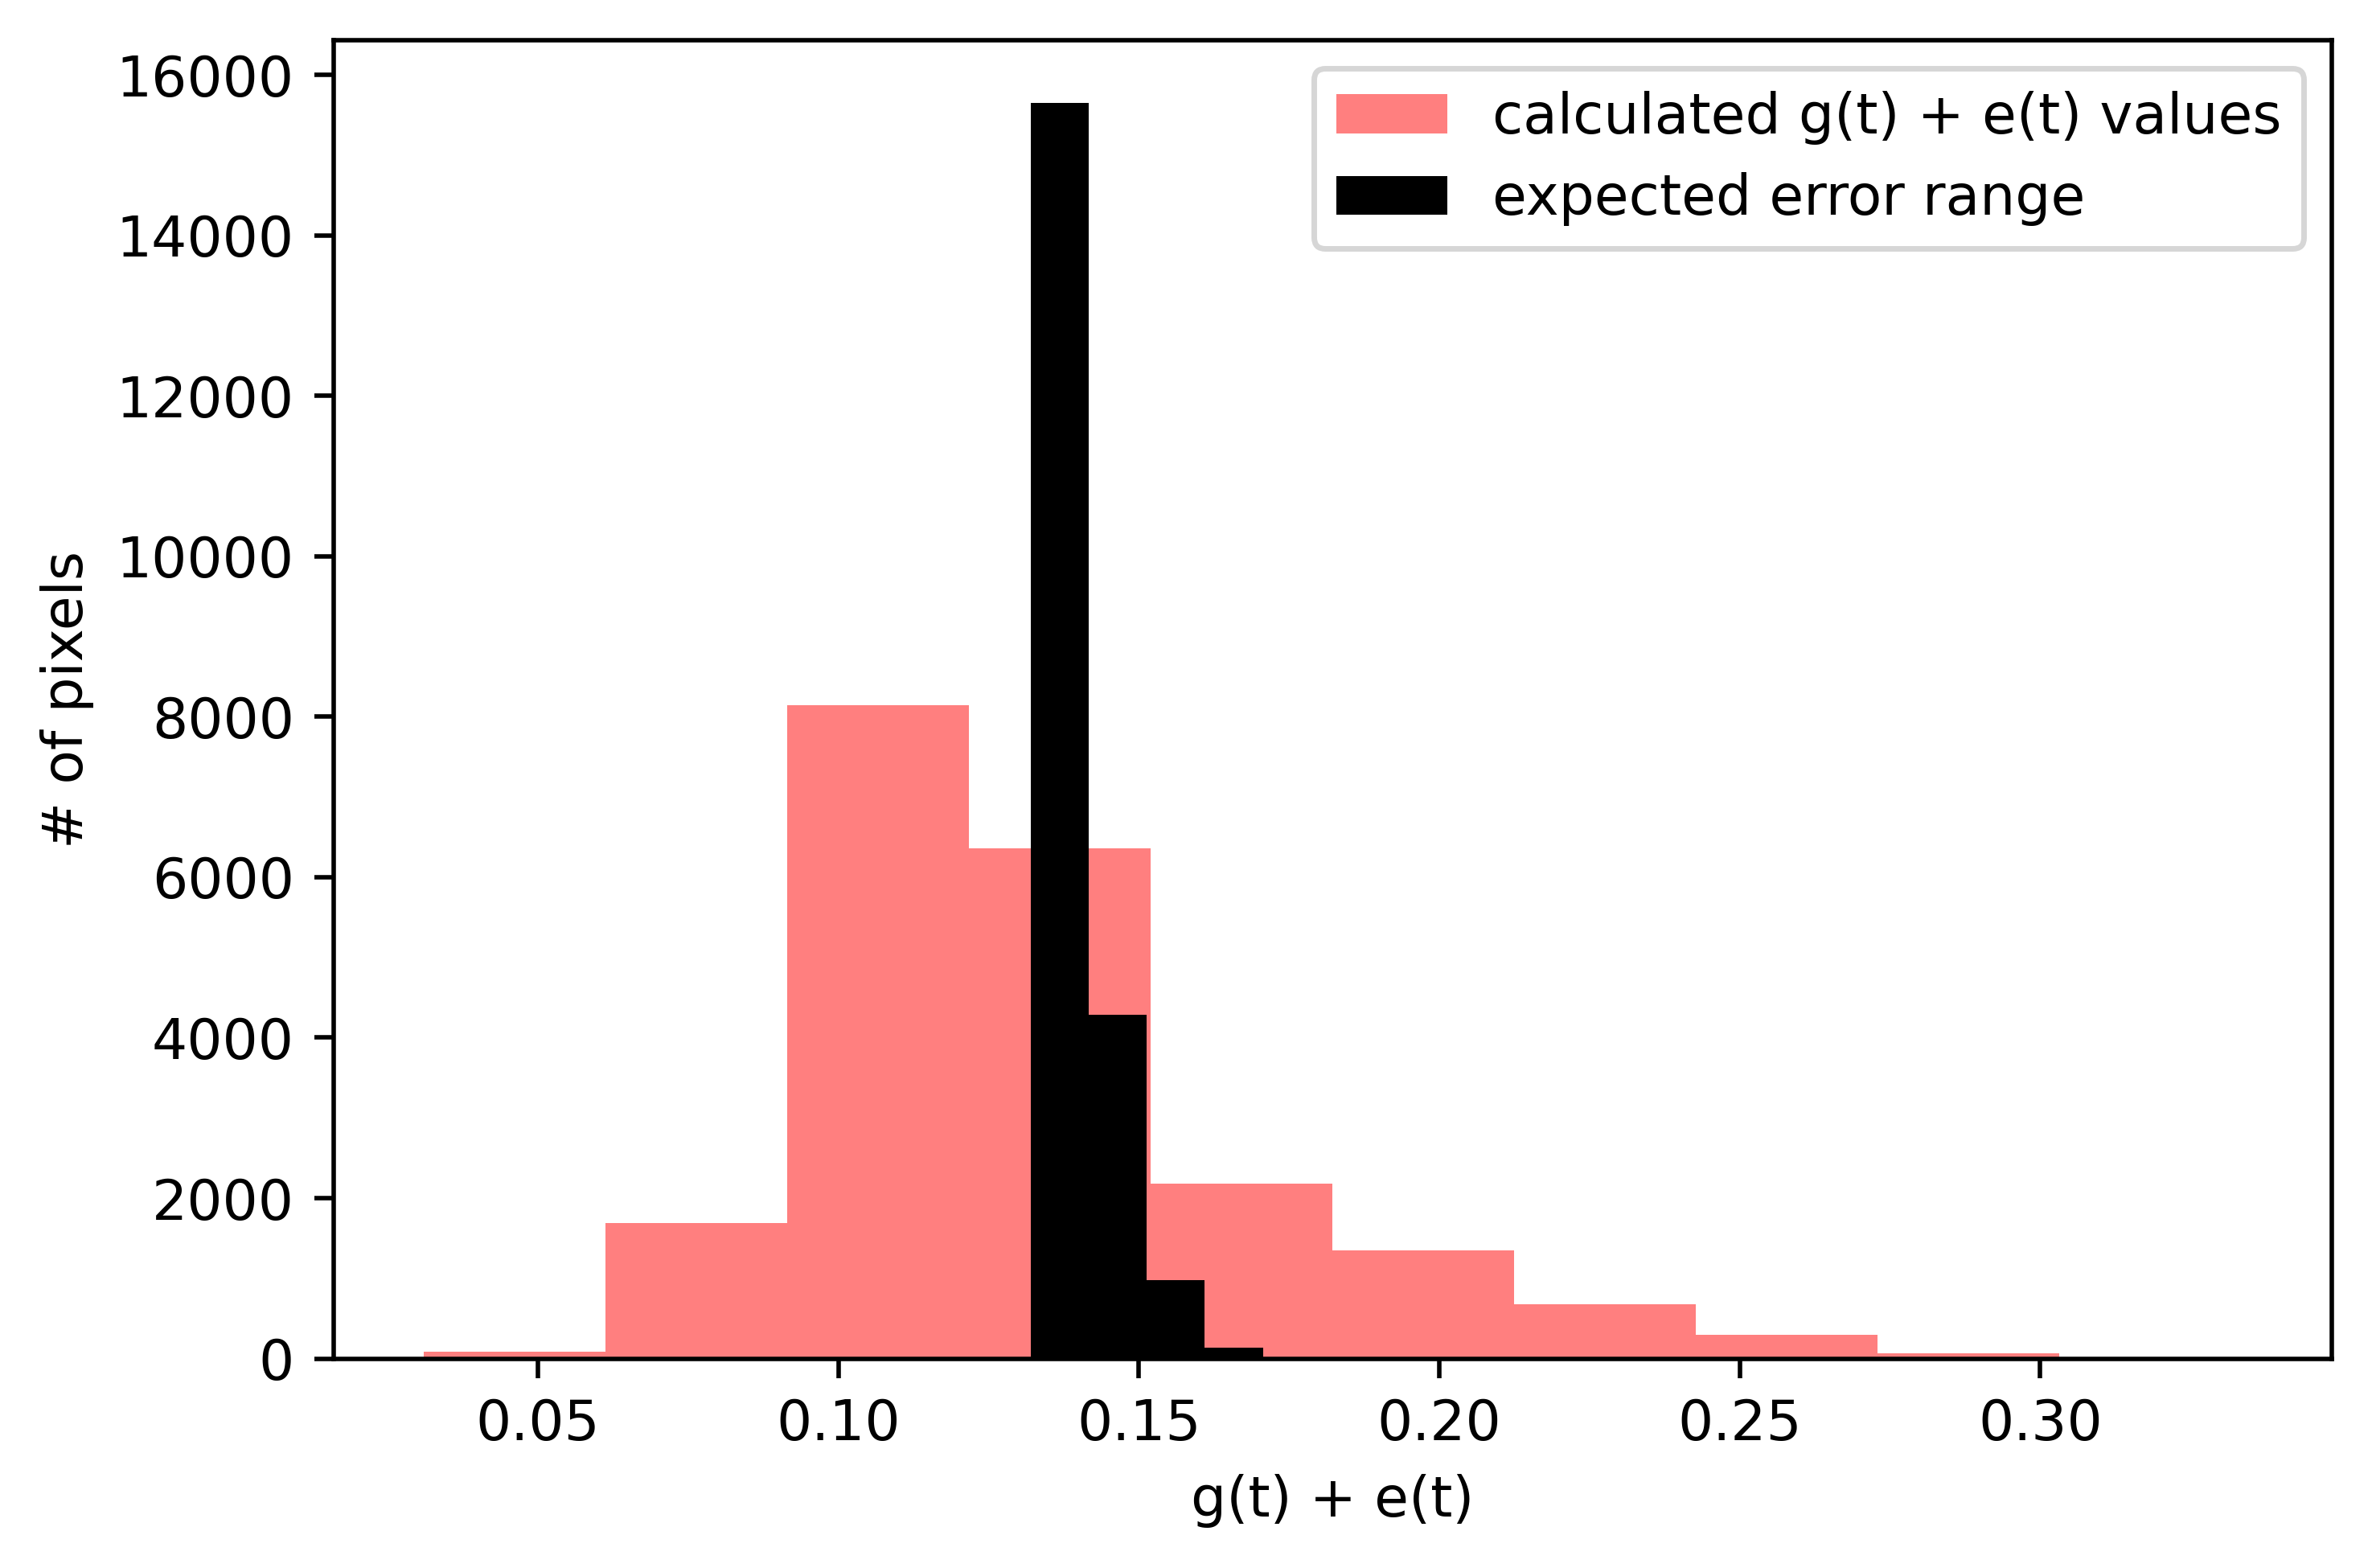

In [30]:
gerrs_shifted = gerrs + np.mean(vals)
plt.hist(vals,color="red",alpha=0.5,label="calculated g(t) + e(t) values")
plt.hist(gerrs_shifted,color="black",alpha=1.0,label="expected error range")
plt.xlabel("g(t) + e(t)")
plt.ylabel("# of pixels")
plt.legend()
plt.tight_layout()
plt.savefig("../figures_presentations/hist_overlay_stearate.png")